# Decision Trees and Random Forests: Public Health
<span style="color: red; font-weight: bold;">Disclaimer: The dataset used in this notebook is synthetic and has been created solely for educational purposes within a machine learning course in social science. It is not intended for use in drawing any medical, political, or other real-world conclusions.</span>

**Course:** Introduction to Machine Learning for Social Science<br>
**Course Code:** CSS5230<br>
**Teacher:** [Sahba Zojaji](https://myweb.cuhk.edu.cn/sahbazojaji/Home/Index)<br>
**University:** The Chinese University of Hong Kong, Shenzhen

## Summary

This notebook provides a comprehensive demonstration of applying the <u>Decision Tree</u> (DT) and <u>Random Forest</u> (RF) algorithms for both <u>classification</u> and <u>regression</u> tasks using a **synthetic** public health dataset. The dataset includes the following columns: 

1. **ID**: A unique identifier for each individual.
2. **Age**: The age of the individual.
3. **Gender**: The gender of the individual (Male/Female).
4. **BMI**: Body Mass Index, a measure of body fat based on height and weight.
5. **Smoking Status**: The smoking status of the individual (Never, Former, Current).
6. **Exercise Frequency**: The frequency of exercise per week.
7. **Cholesterol Level**: The cholesterol level of the individual.
8. **Blood Pressure**: The blood pressure of the individual.
9. **Health Risk Score**: A calculated score representing the overall health risk of the individual.
10. **Health Risk Category**: The health risk category of the individual (Low, Medium, High).

### Goal:

The goal is to predict health risk scores (for regression) and health risk categories (for classification) based on features such as age, gender, BMI, smoking status, exercise frequency, cholesterol level, and blood pressure.

## Loading the Dataset

We will load the public health dataset that contains features such as age, gender, BMI, smoking status, exercise frequency, cholesterol level, blood pressure, <u>health risk score (for regression)</u>, and <u>health risk category (for classification)</u>.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('public_health_dataset.csv')

data.head()

,ID,Age,Gender,BMI,Smoking Status,Exercise Frequency,Cholesterol Level,Blood Pressure,Health Risk Score,Health Risk Category
0,1,62,Female,22.812775,Former,4,119.690569,104.027015,74.966827,Medium
1,2,65,Female,18.902457,Former,0,151.031562,106.691143,78.305866,Medium
2,3,82,Female,31.286677,Former,0,167.483621,87.811173,95.605578,Medium
3,4,85,Male,23.427027,Former,2,124.839669,91.354148,80.921337,Medium
4,5,85,Female,25.755887,Former,6,192.860153,121.826556,95.150886,Medium


## Data Preprocessing  
Before building the models, we need to preprocess the data. Here's what we'll do:  

1. **Drop unnecessary columns**:  
   - The `ID` column is not useful for modeling.  

2. **Encode categorical variables**:  
   - Convert `Gender` and `Smoking Status` into numerical values.  

3. **Separate features and target**:  
   - For **classification**: Target = `Health Risk Category`.  
   - For **regression**: Target = `Health Risk Score`.  

In [6]:
# Drop the ID column
data = data.drop(columns=['ID'])

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Smoking Status'] = label_encoder.fit_transform(data['Smoking Status'])

# Separate features and target
X = data.drop(columns=['Health Risk Category', 'Health Risk Score'])  # Features
y_class = data['Health Risk Category']  # Target for classification
y_reg = data['Health Risk Score']  # Target for regression

## Splitting the Dataset

We will split the dataset into the training set and test set.

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train_class, y_test_class, y_train_reg, y_test_reg = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42
)

## **<span style="color:green">A. Decision Tree Classifier</span>**
We’ll use DecisionTreeClassifier to predict the Health Risk Category.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train_class)

# Make predictions
y_pred_class = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")

Decision Tree Classifier Accuracy: 0.81


## B. Classification Report

The classification report provides key metrics to evaluate the performance of a classification model. Here are the metrics included in the report:

### Detailed Metrics

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. It indicates how many of the predicted positive instances are actually positive.
- **Recall**: The ratio of correctly predicted positive observations to the all observations in the actual class. It indicates how many of the actual positive instances are captured by the model.
- **F1-Score**: The weighted average of Precision and Recall. It provides a balance between Precision and Recall.
- **Support**: The number of actual occurrences of the class in the dataset.


### Overall Metrics

- **Accuracy**: The ratio of correctly predicted instances to the total instances. It indicates the overall effectiveness of the model.

- **Macro Average**: The average of Precision, Recall, and F1-Score calculated for each class independently and then averaged.

- **Weighted Average**: The average of Precision, Recall, and F1-Score calculated for each class, weighted by the number of instances in each class.

In [18]:
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

        High       0.76      0.75      0.75        76
      Medium       0.85      0.85      0.85       124

    accuracy                           0.81       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.81      0.81       200



## C. Decision Tree Visualization

We will plot only the first few levels of the tree to make it easier to see and understand.

### Node Information
Each node in the decision tree provides the following information:
- **Feature:** The feature used to split the data at that node.
- **Threshold:** The value that determines the split for the feature.
- **Gini Index:** The measure of impurity or how mixed the classes are at that node.
- **Samples:** The number of samples at that node.
- **Value:** The distribution of samples across different classes at that node.

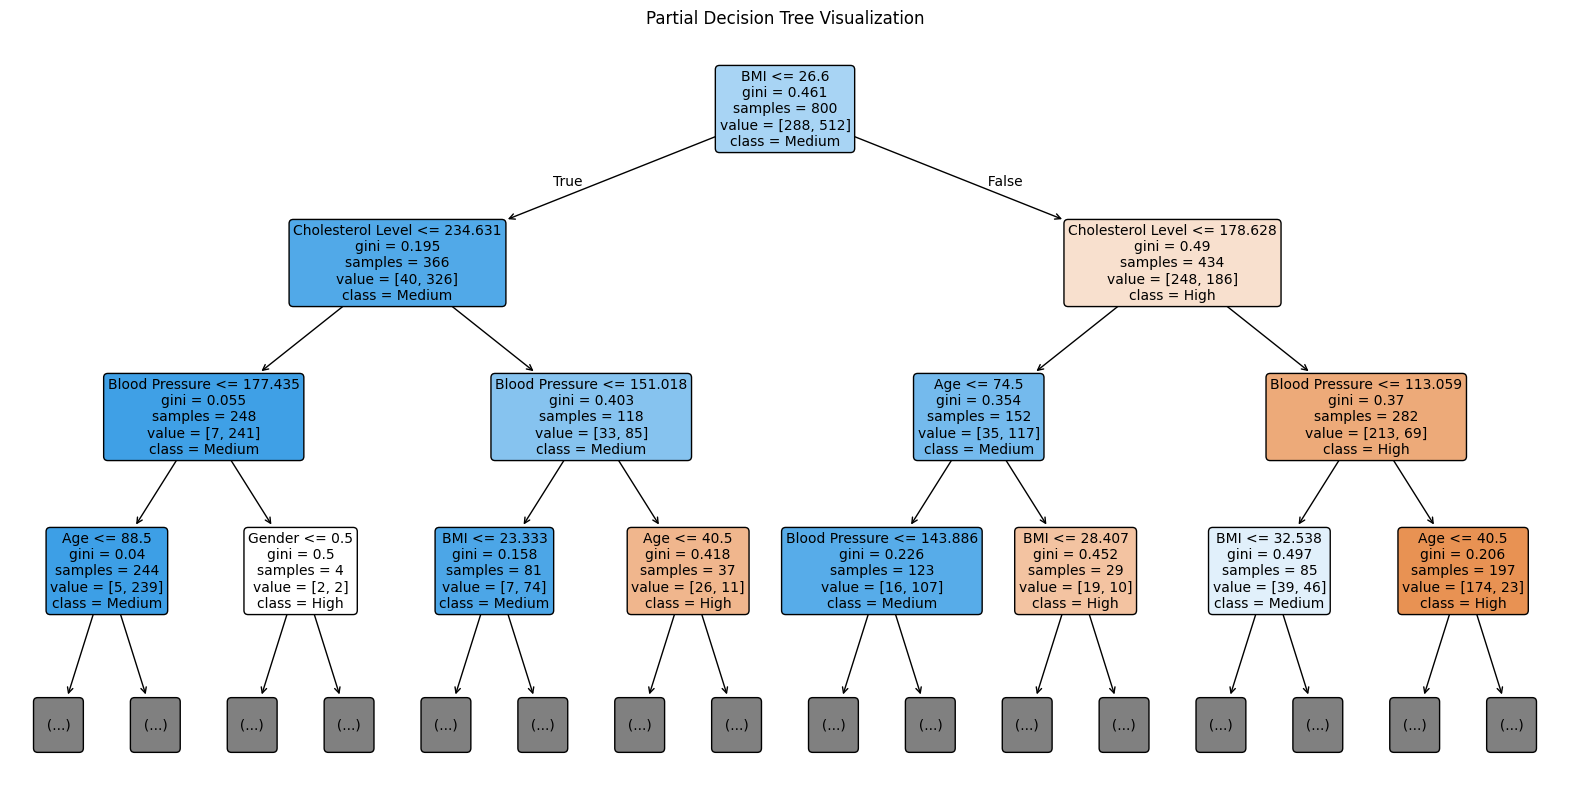

In [16]:
# Plot a small part of the decision tree (limiting depth)
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(
    dt_classifier, 
    feature_names=X.columns,  # Use feature names for better readability
    class_names=[str(cls) for cls in dt_classifier.classes_],  # Use class names
    filled=True,  # Fill nodes with colors
    rounded=True,  # Use rounded corners
    fontsize=10,  # Adjust font size
    max_depth=3  # Limit the depth of the tree
)
plt.title("Partial Decision Tree Classifier Visualization")
plt.show()

# <span style="color:red">1. DT Classifier Hyperparameters Tuning Assignment</span>

## Objective:
Explore the impact of various hyperparameters on the performance of the Decision Tree Classifier.

## Instructions:
1. **max_depth**: Try limiting the depth of the tree (e.g., max_depth=3).
2. **min_samples_split**: Set the minimum number of samples required to split a node (e.g., min_samples_split=10).
3. **criterion**: Try using entropy instead of gini for splitting.

For each combination of hyperparameters:
- Train the Decision Tree Classifier.
- Provide the outputs for A, B, and C in your report for different combinations of hyperparameters.

**At least 2 combinations must be included in your final report.**

# **<span style="color:green">D. Decision Tree Regressor</span>**
We’ll use DecisionTreeRegressor to predict the Health Risk Score.

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train_reg)

# Make predictions
y_pred_reg = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"Decision Tree Regressor MSE: {mse:.2f}")
print(f"Decision Tree Regressor R²: {r2:.2f}")

Decision Tree Regressor MSE: 29.98
Decision Tree Regressor R²: 0.83


## E. Decision Tree Visualization
We will plot only the first few levels of the tree to make it easier to see and understand.

### Node Information
Each node in the decision tree regressor provides the following information:
- **Feature:** The feature used to split the data at that node.
- **Threshold:** The value that determines the split for the feature.
- **MSE (Mean Squared Error):** The measure of impurity or how mixed the values are at that node.
- **Value:** The average target value at that node.


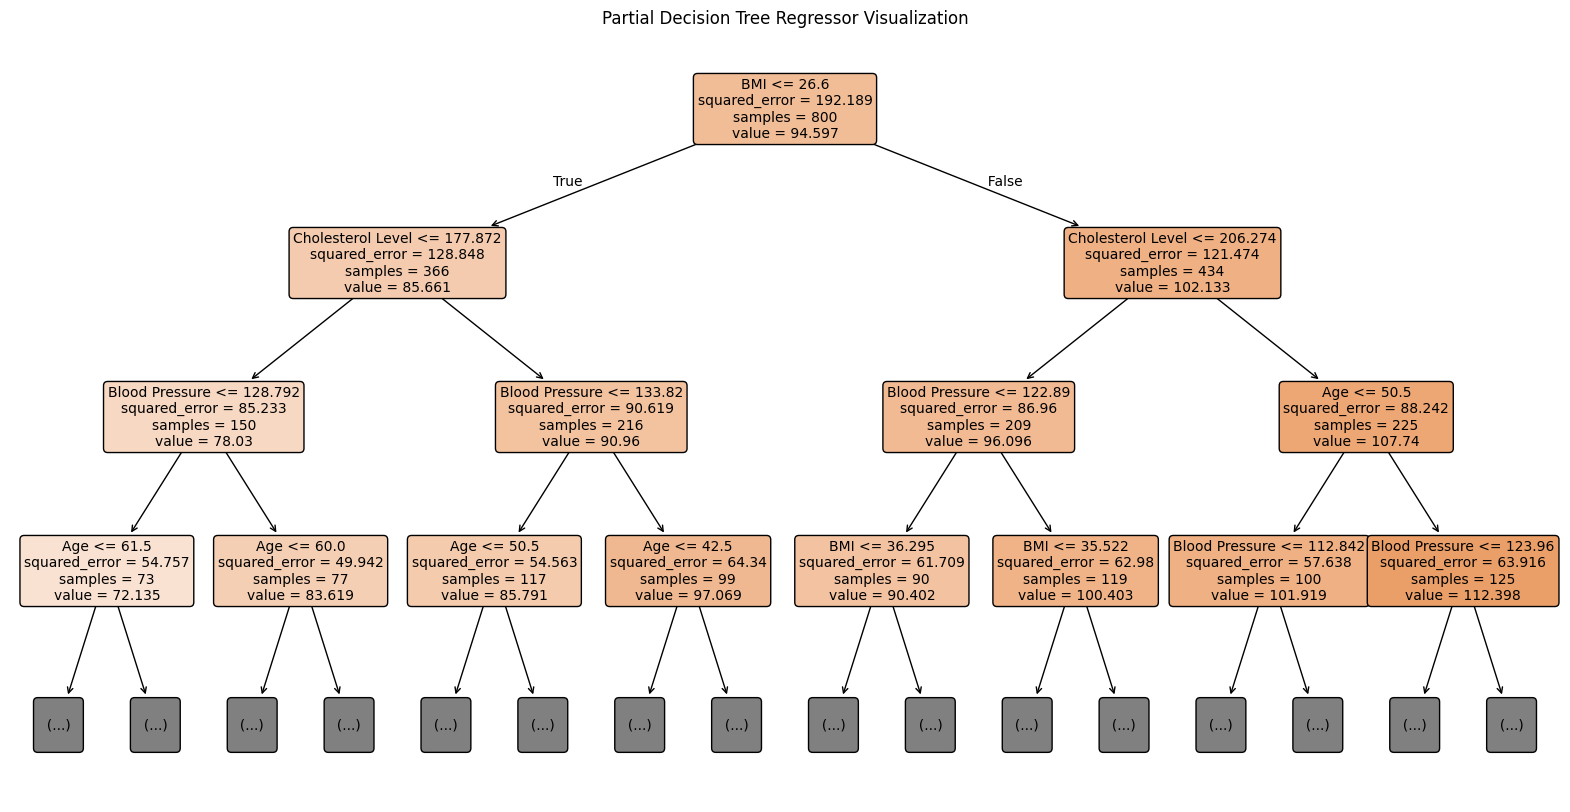

In [27]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_regressor, 
    feature_names=X.columns,  # Use feature names for better readability
    filled=True,  # Fill nodes with colors
    rounded=True,  # Use rounded corners
    fontsize=10,  # Adjust font size
    max_depth=3  # Limit the depth of the tree
)
plt.title("Partial Decision Tree Regressor Visualization")
plt.show()

# <span style="color:red">2. DT Regressor Hyperparameters Tuning Assignment</span>

**Objective:**
Explore the impact of various hyperparameters on the performance of the Decision Tree Regressor.

**Instructions:**
- **max_depth:** Try limiting the depth of the tree (e.g., max_depth=3).
- **min_samples_split:** Set the minimum number of samples required to split a node (e.g., min_samples_split=10).
- **criterion:** Try using "mae" (Mean Absolute Error) instead of "mse" (Mean Squared Error) for splitting.

For each combination of hyperparameters:
1. Train the Decision Tree Regressor.
2. Provide the outputs for D and E in your report for different combinations of hyperparameters.

**At least 2 combinations must be included in your final report.**

## **<span style="color:green">F. Random Forest Classifier</span>**
We’ll use RandomForestClassifier to predict the Health Risk Category.

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train_class)

# Make predictions
y_pred_class = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

Random Forest Classifier Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

        High       0.96      0.88      0.92        76
      Medium       0.93      0.98      0.95       124

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.94       200
weighted avg       0.94      0.94      0.94       200



## G. RF Classifer Feature Importance
You can check the importance of each feature of the RandomForestClassifier:

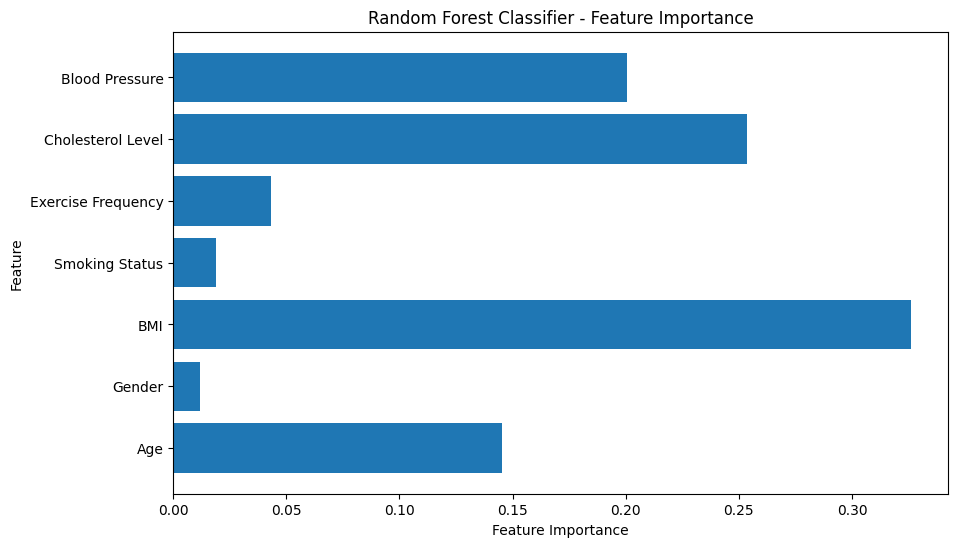

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Classifier - Feature Importance")
plt.show()

# <span style="color:red">3. RF Classifier Hyperparameters Tuning Assignment</span>

**Objective:**
Explore the impact of various hyperparameters on the performance of the Random Forest Classifier.

**Instructions:**
- **n_estimators:** Try different numbers of trees in the forest (e.g., n_estimators=100).
- **max_depth:** Try limiting the depth of the trees (e.g., max_depth=3).
- **min_samples_split:** Set the minimum number of samples required to split a node (e.g., min_samples_split=10).
- **criterion:** Try using "entropy" instead of "gini" for splitting.

For each combination of hyperparameters:
1. Train the Random Forest Classifier.
2. Provide the outputs for F and G in your report for different combinations of hyperparameters.

**At least 2 combinations must be included in your final report.**


## **<span style="color:green">H. Random Forest Regressor</span>**
We’ll use RandomForestRegressor to predict the Health Risk Score.

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train_reg)

# Make predictions
y_pred_reg = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"Random Forest Regressor MSE: {mse:.2f}")
print(f"Random Forest Regressor R²: {r2:.2f}")

Random Forest Regressor MSE: 8.87
Random Forest Regressor R²: 0.95


## I. RF Regressor Feature Importance
You can check the importance of each feature of the RandomForestRegressor:

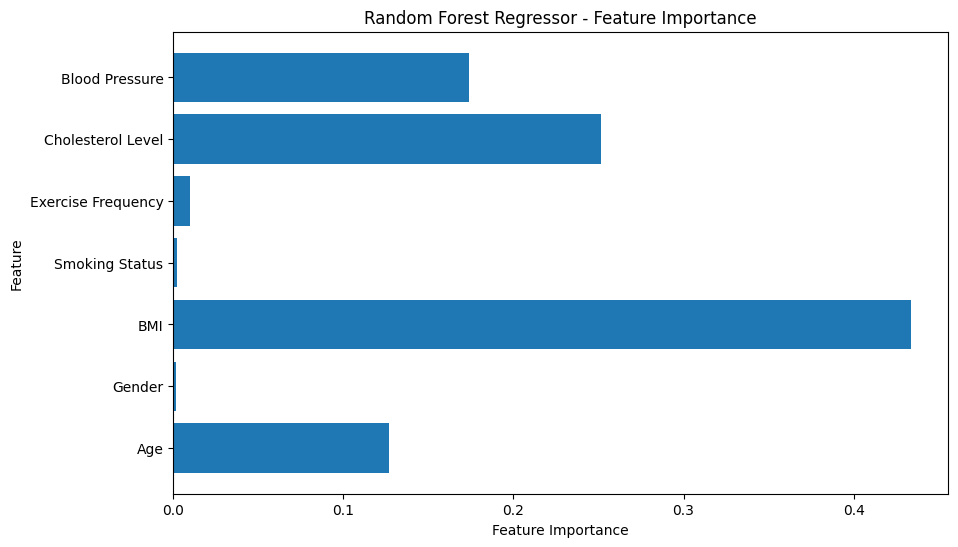

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_regressor.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Regressor - Feature Importance")
plt.show()

# <span style="color:red">4. RF Regressor Hyperparameters Tuning Assignment</span>

**Objective:**
Explore the impact of various hyperparameters on the performance of the Random Forest Regressor.

**Instructions:**
- **n_estimators:** Try different numbers of trees in the forest (e.g., n_estimators=100).
- **max_depth:** Try limiting the depth of the trees (e.g., max_depth=3).
- **min_samples_split:** Set the minimum number of samples required to split a node (e.g., min_samples_split=10).
- **criterion:** Try using "mae" (Mean Absolute Error) instead of "mse" (Mean Squared Error) for splitting.

For each combination of hyperparameters:
1. Train the Random Forest Regressor.
2. Provide the outputs for H and I in your report for different combinations of hyperparameters.

**At least 2 combinations must be included in your final report.**
